#  Task 1: Exploratory Data Analysis (EDA)

#### Step 1: Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Loading Data

In [25]:
customers = pd.read_csv("C:\\Users\\JOGESH\\Downloads\\Customers.csv")
products = pd.read_csv("C:\\Users\\JOGESH\\Downloads\\Products.csv")
transactions = pd.read_csv("C:\\Users\\JOGESH\\Downloads\\Transactions.csv")

#### Step 3: Inspect Data

In [5]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [6]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [7]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [8]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

#### Step 4: Cleaning Data

In [11]:
print(customers.isna().sum())
print(products.isna().sum())
print(transactions.isna().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


#### Step 5: Performing EDA

#### Customer Distribution by Region

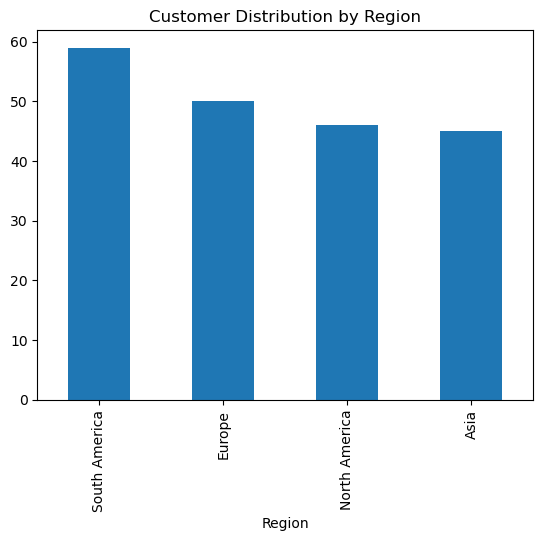

In [12]:
region_distribution = customers['Region'].value_counts()
region_distribution.plot(kind='bar', title='Customer Distribution by Region')
plt.show()

#### Product Categories

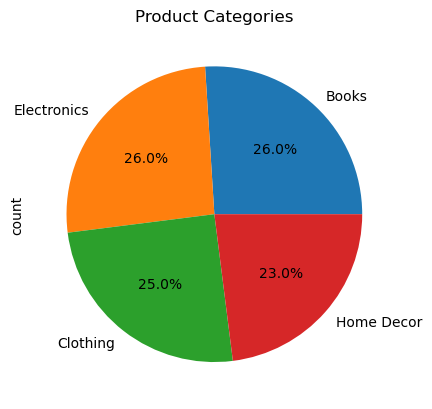

In [13]:
product_categories = products['Category'].value_counts()
product_categories.plot(kind='pie', autopct='%1.1f%%', title='Product Categories')
plt.show()

#### Top 10 Products by Sales

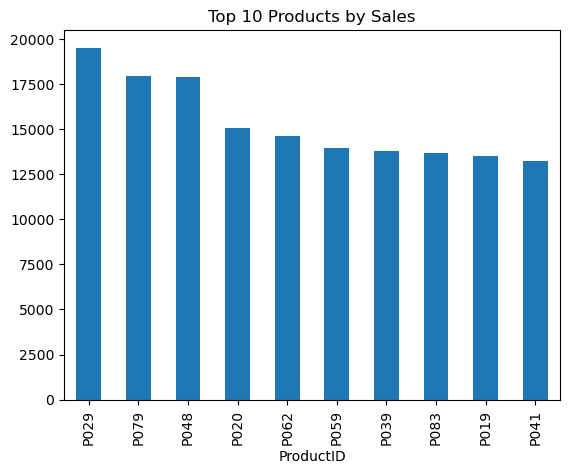

In [14]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Sales')
plt.show()

#### Monthly Sales Trends

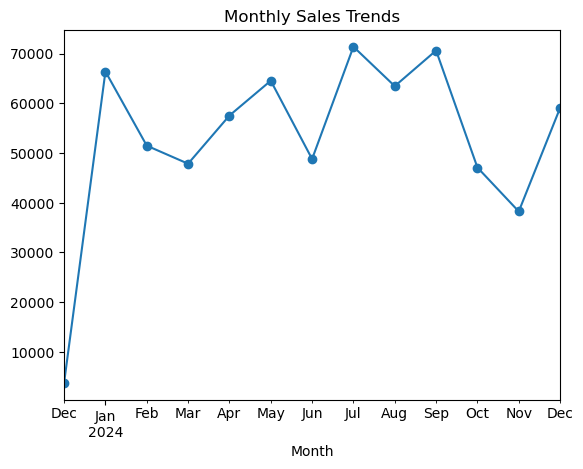

In [15]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trends')
plt.show()

#### Customer Spend Analysis

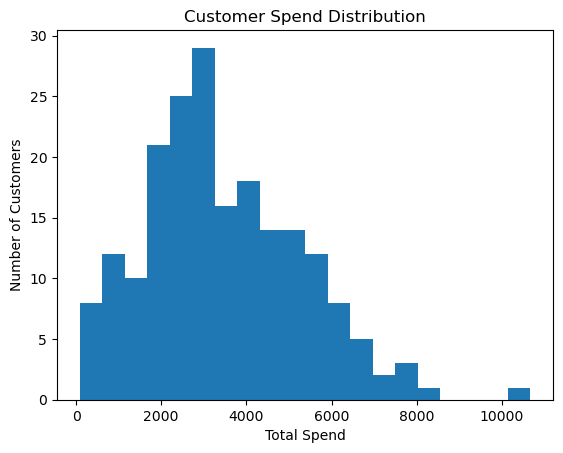

In [24]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
customer_spending.hist(bins=20,grid=0)
plt.title('Customer Spend Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()